In [1]:
import numpy as np
import time

In [2]:
#test array
A = np.random.randint(0,100,10)

In [3]:
def insertion_sort(A):
  for j in range(len(A)):
      key = A[j]
      # insert A[j] into sorted sequence A[0..j-1]
      i = j-1
      while i>-1 and A[i]>key:
          A[i+1] = A[i]
          i = i-1
      A[i+1] = key
  return A

In [4]:
def merge_sort(A):
  n = len(A)
  if n==1: 
      return A
  mid = n//2     # floor division
  #print('before call',A[:mid],A[mid:])
  L = merge_sort(A[:mid])
  R = merge_sort(A[mid:])
  #print('after call',L,R)
  return np.asarray(merge(L,R))

def merge(L,R):
  #print('Start',L,R)
  i = 0
  j = 0
  answer = []
  while i<len(L) and j<len(R):
      if L[i]<R[j]:
          answer.append(L[i])
          i += 1
      else:
          answer.append(R[j])
          j += 1
  if i<len(L):
      #print('before extend,i',answer)
      answer.extend(L[i:])
      #print('after extend,i',answer)
  if j<len(R):
      #print('before extend,j',answer)
      answer.extend(R[j:])
      #print('after extend,j',answer)
  return answer

In [5]:
#Test basic running
print(A,insertion_sort(A),merge_sort(A))

[ 7  9 35 36 52 59 64 80 81 90] [ 7  9 35 36 52 59 64 80 81 90] [ 7  9 35 36 52 59 64 80 81 90]


In [6]:
#Performance plots
def method(method,size,max_input_size):
  variants = len(range(10,max_input_size,1))
  B = np.zeros((variants,size))
  #Plot performance of binary search
  for i in range(size-1):
    count = 0
    for n in range(10,max_input_size,1):
      A = np.random.randint(0,100,n)
      start = time.time()
      method(A)
      end = time.time()
      B[count,0] = n
      B[count,i+1] = end-start
      count = count+1
  return B

In [7]:
size=10
max_input_size = 500
B1 = method(insertion_sort,size,max_input_size)
B2 = method(merge_sort,size,max_input_size)
variants = len(range(10,max_input_size,1))

In [8]:
C = np.zeros((variants,3))
C[:,0] = B1[:,0]
C[:,1] = np.mean(B1[:,1:size-1],axis=1)*1000
C[:,2] = np.mean(B2[:,1:size-1],axis=1)*1000

Text(0.5, 1.0, 'Insertion Sort (Quadratic) vs Merge Sort (nLog(n)) Performance')

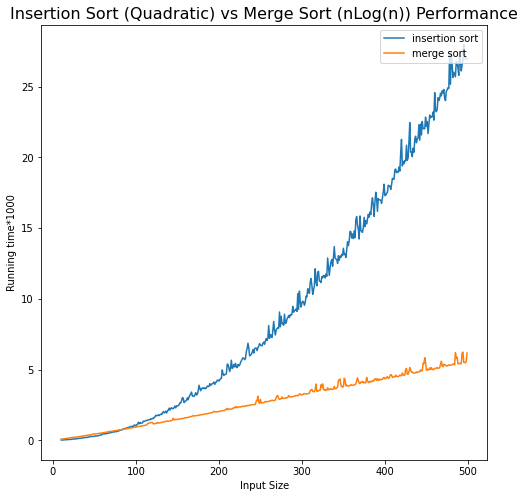

In [9]:
#Plot Performance vs Input Size
import matplotlib.pyplot as plt

plt.figure(figsize = (8,8))
plt.plot(C[:,0],C[:,1],label = 'insertion sort')
plt.plot(C[:,0],C[:,2],label = 'merge sort')
plt.xlabel('Input Size')
plt.ylabel('Running time*1000')
plt.legend(loc="upper right")
plt.title('Insertion Sort (Quadratic) vs Merge Sort (nLog(n)) Performance',fontsize=16)